# 官方LSTM预测准确度测试

In [44]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

# 数据处理

## 数据导入

In [45]:
# 加载数据
data = pd.read_csv('../dataset/zgpa_train.csv') # 有所有的信息，用于展示，这里是一天一个数据
dataset = pd.read_csv('../dataset/zgpa_train.csv', header=0, parse_dates=[0],
                        index_col=0, usecols=[0, 5]) # 只有时间和股票价格的数据，用于做数据集
# 查看数据
print(data.head())

         date   open   high    low  close    volume
0  2016-01-04  30.57  30.57  28.63  28.78  70997200
1  2016-01-05  28.41  29.54  28.23  29.23  87498504
2  2016-01-06  29.03  29.39  28.73  29.26  48012112
3  2016-01-07  28.73  29.25  27.73  28.50  23647604
4  2016-01-08  28.73  29.18  27.63  28.67  98239664


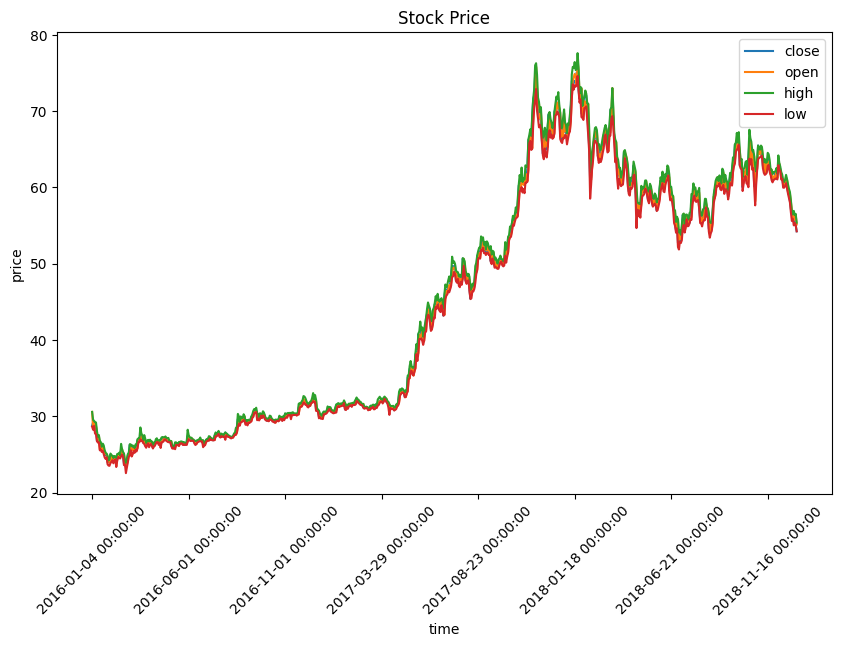

In [46]:
# 画图展示股票信息
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='close') # 画出收盘价
plt.plot(data['open'], label='open') # 画出开盘价
plt.plot(data['high'], label='high') # 画出最高价
plt.plot(data['low'], label='low') # 画出最低价
plt.title('Stock Price')
plt.xlabel('time')
# 用time列表示x轴的时间
time_line = pd.to_datetime(data['date'])
# 旋转x轴的45度
plt.xticks(rotation=45)
plt.xticks(range(0, len(time_line), 100), time_line[::100])
plt.ylabel('price')
plt.legend()
plt.show()

## 创建用于模型的数据集

In [47]:
def creat_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    print("数据集长度：",len(dataset))
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i+look_back)] # 按照一个时间窗口来取数据
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY) # X是前look_back天的数据，Y是第look_back天的数据，用于训练的时候判断模型精度

## 数据归一化

In [48]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = dataset.values # 转换成numpy数组
dataset = scaler.fit_transform(dataset.reshape(-1,1))

## 划分数据集

In [49]:
train_size = int(len(dataset)*0.8) # 2 8分
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

## 生成训练和测试集

In [50]:
look_back = 1 # 表示考虑过去多久的数据
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)

数据集长度： 584
数据集长度： 147


# 模型定义

## 定义LSTM网络架构

In [51]:
model = Sequential()

model = Sequential()

model.add(LSTM(units=50, input_shape=(None, 1), return_sequences=True)) # 50个神经元
#model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True)) # 100个神经元
#model.add(Dropout(0.2))

model.add(LSTM(units=200, return_sequences=True)) # 200个神经元
#model.add(Dropout(0.2))

model.add(LSTM(300, return_sequences=False)) # 300个神经元
model.add(Dropout(0.2))

model.add(Dense(100)) # 100个神经元全连接层，用于输出
model.add(Dense(units=1)) # 1个神经元全连接层，用于输出，预测接下来一个时间点的股票价格

model.add(Activation('relu')) # 激活函数
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, None, 50)          10400     
                                                                 
 lstm_17 (LSTM)              (None, None, 100)         60400     
                                                                 
 lstm_18 (LSTM)              (None, None, 200)         240800    
                                                                 
 lstm_19 (LSTM)              (None, 300)               601200    
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 1)               

## 模型训练以及训练过程可视化

In [52]:
history = model.fit(trainX, trainY, batch_size=64, epochs=50, 
                    validation_split=0.1, verbose=2)
print('compilation time:', time.time()-start)

Epoch 1/50
9/9 - 5s - loss: 0.0409 - val_loss: 0.0212 - 5s/epoch - 543ms/step
Epoch 2/50
9/9 - 0s - loss: 0.0257 - val_loss: 0.0245 - 71ms/epoch - 8ms/step
Epoch 3/50
9/9 - 0s - loss: 0.0236 - val_loss: 0.0273 - 67ms/epoch - 7ms/step
Epoch 4/50
9/9 - 0s - loss: 0.0232 - val_loss: 0.0234 - 67ms/epoch - 7ms/step
Epoch 5/50
9/9 - 0s - loss: 0.0227 - val_loss: 0.0227 - 66ms/epoch - 7ms/step
Epoch 6/50
9/9 - 0s - loss: 0.0215 - val_loss: 0.0218 - 68ms/epoch - 8ms/step
Epoch 7/50
9/9 - 0s - loss: 0.0173 - val_loss: 0.0220 - 67ms/epoch - 7ms/step
Epoch 8/50
9/9 - 0s - loss: 0.0134 - val_loss: 0.0237 - 71ms/epoch - 8ms/step
Epoch 9/50
9/9 - 0s - loss: 0.0128 - val_loss: 0.0205 - 67ms/epoch - 7ms/step
Epoch 10/50
9/9 - 0s - loss: 0.0130 - val_loss: 0.0215 - 68ms/epoch - 8ms/step
Epoch 11/50
9/9 - 0s - loss: 0.0129 - val_loss: 0.0227 - 66ms/epoch - 7ms/step
Epoch 12/50
9/9 - 0s - loss: 0.0130 - val_loss: 0.0210 - 66ms/epoch - 7ms/step
Epoch 13/50
9/9 - 0s - loss: 0.0128 - val_loss: 0.0211 - 70ms

## 数据预测

In [53]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

5/5 [==============================] - 0s 2ms/step


## 数据反归一化

In [54]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

## 画图展示结果

In [55]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset.shape[0], 1))
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [56]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset.shape[0], 1))
testPredictPlot[len(trainPredict)+(look_back*2)+1: len(dataset)-1, :] = testPredict

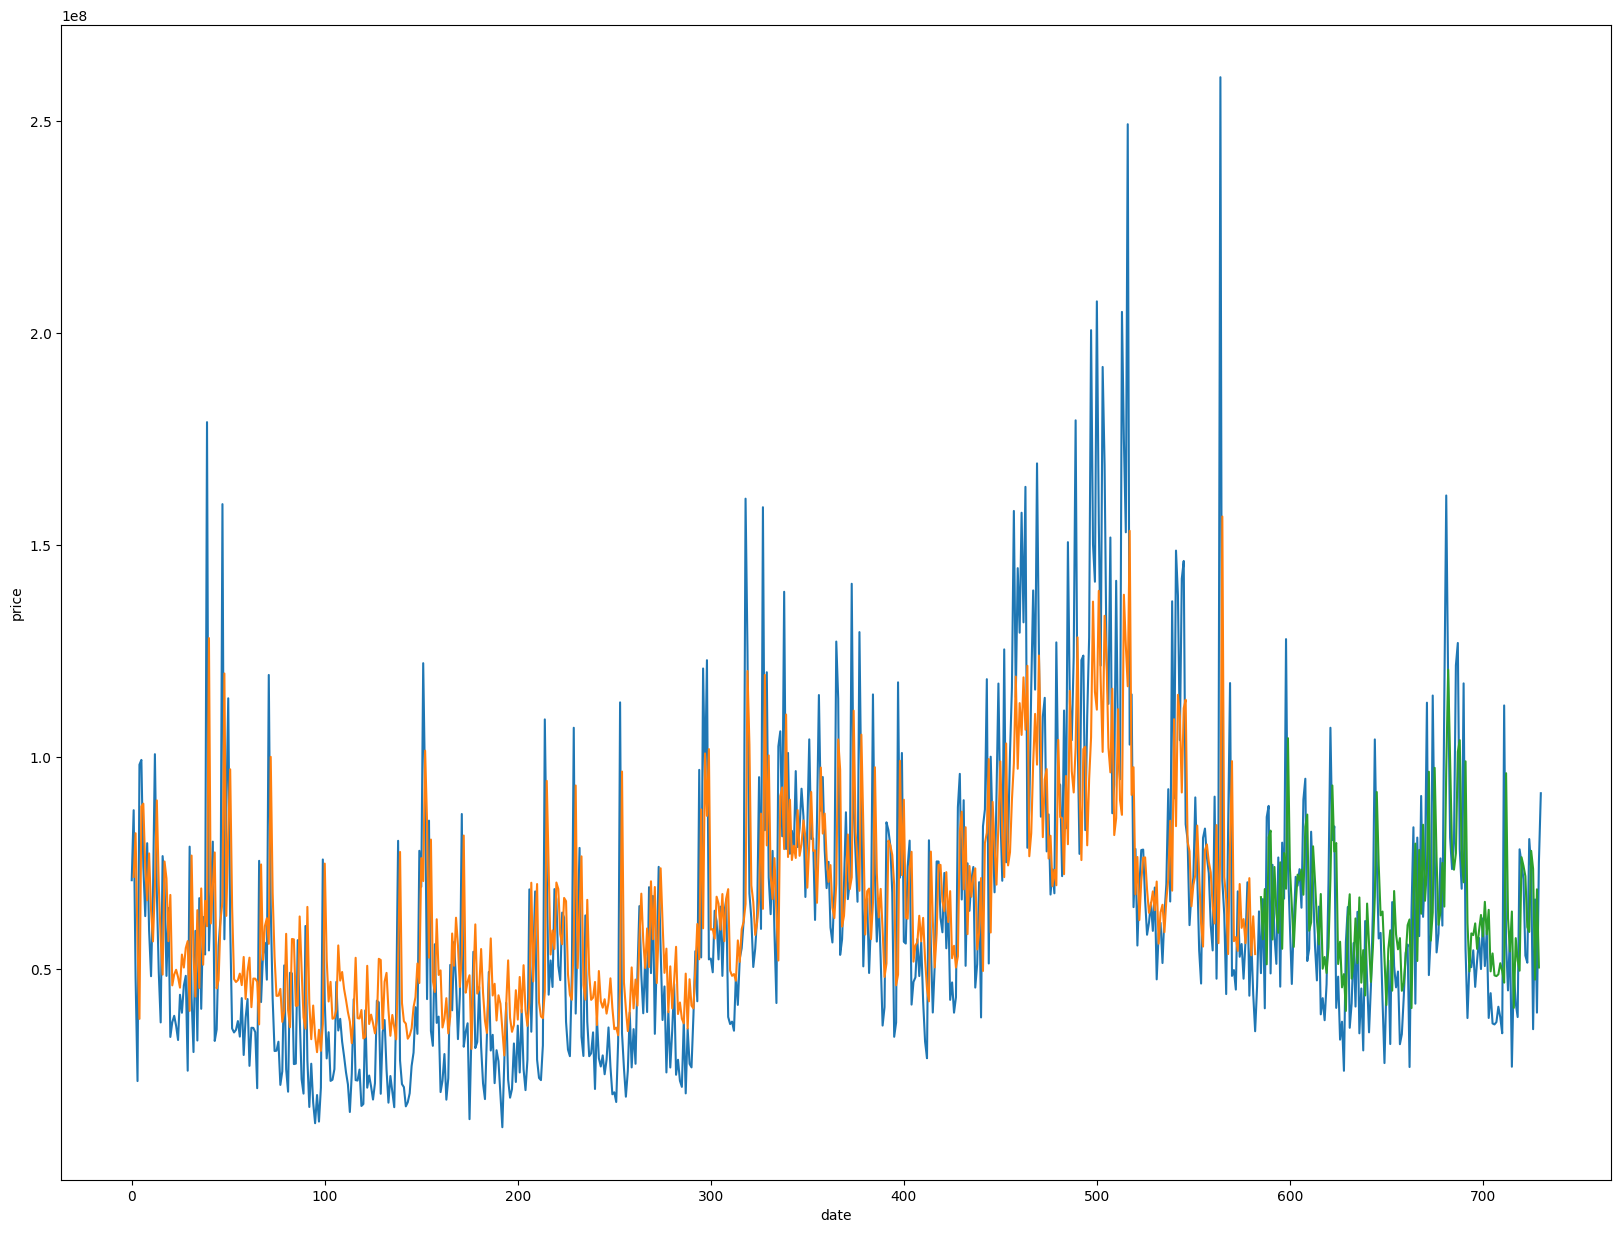

In [57]:
fig2 = plt.figure(figsize=(20, 15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('price')
plt.xlabel('date')
plt.show()

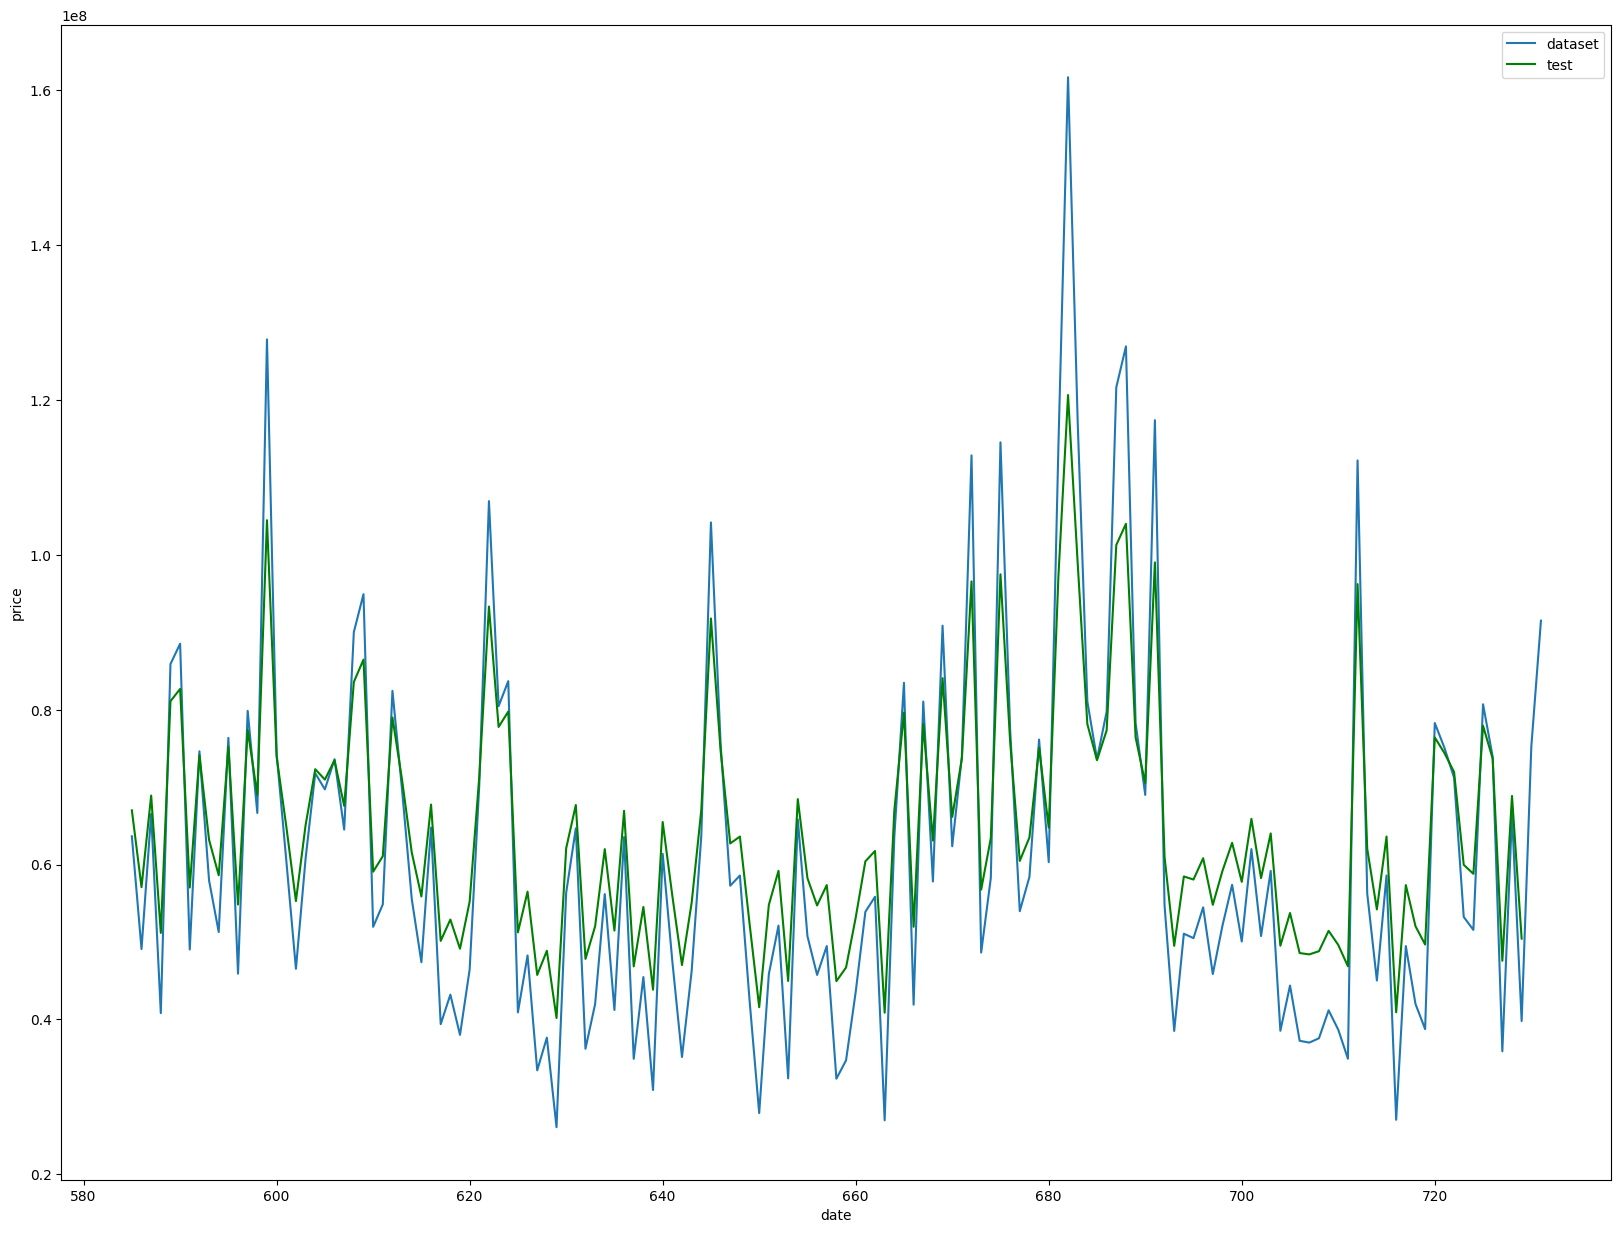

In [58]:
fig3 = plt.figure(figsize=(20, 15))
plt.plot(np.arange(train_size+1, len(dataset)+1, 1), scaler.inverse_transform(dataset)[train_size:], label='dataset')
plt.plot(testPredictPlot, 'g', label='test')
plt.ylabel('price')
plt.xlabel('date')
plt.legend()
plt.show()
